test.txt Opened
1
2
executed


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


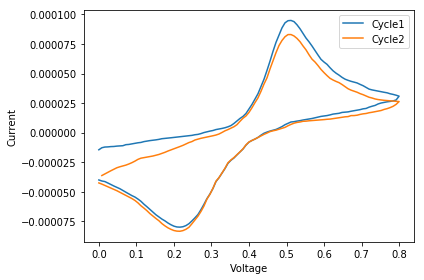

In [43]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import main

In [2]:
# Check for all the modules that required if not exist then exit with notification.
import sys
import imp
try:
    imp.find_module('numpy')
    foundnp = True
except ImportError:
    foundnp = False
try:
    imp.find_module('matplotlib')
    foundplot = True
except ImportError:
    foundplot = False
try:
    imp.find_module('pandas')
    foundpd = True
except ImportError:
    foundplot = False
if not foundnp:
    print("Numpy is required. Exiting")
    sys.exit()
if not foundplot:
    print("Matplotlib is required. Exiting")
    sys.exit()
if not foundpd:
    print("Pandas is required. Exiting")
    sys.exit()

In [3]:
# This part use classification. All the following code blocks with correct indentation should be able to use the same style. 
# part of _init_
class cv:
    _colors = {'red': 'r', 'green': 'g', 'blue': 'b', 'yellow': 'y', 'cyan': 'c', 'magenta': 'm', 'black': 'k', 'white': 'w'}
    _linestyles = {' ': ' ', '-': 'solid', '--': 'dashed', '-.': 'dash_dot', ':': 'dotted'}
    _markers  = {' ': ' ', '.': '.', '_' : '_', 'o': 'o', '*': '*', '+': '+', 'x': 'x', 'square': 's', 'triangle': '^', 'diamond': 'd'}


In [4]:
# Find relevant files in folder
path = os.getcwd()
extension = ['csv','txt','dat'] # Should include all the possible ones
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print("Plotting the following:")
print(result)
#Make x-axis
t = np.linspace(325, 1100, 776)

Plotting the following:
[]


In [7]:
df=pd.read_csv('../Rawdata/PadraoK3_Gaiola_cell3eletrodos.txt', sep='\t')
df.head()

,E /V,I /uA,I /uA.1
0,0.500,0.130,7.040
1,0.499,0.102,6.998
2,0.498,0.083,6.964
3,0.497,0.064,6.932
4,0.496,0.061,6.908


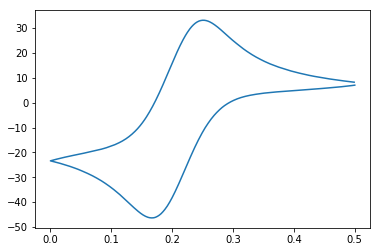

In [8]:
%matplotlib inline
plt.plot(df['E /V'],df['I /uA.1'])

In [19]:
def split(vector):
    """
    This function takes an array and splits it into two half.
    """
    split = int(len(vector)/2)
    end = int(len(vector))
    vector1 = np.array(vector)[0:split]
    vector2 = np.array(vector)[split:end]
    return vector1, vector2

In [54]:
import peakutils 
def peak_detection(data_y):
    """ peak_detection(dataframe['y column'])
    This function returns a list of the indecies of the y values of the peaks detected in the dataset.
    The function takes an input of the column containing the y variables in the dataframe.
    This column is then split into two arrays, one of the positive and one of the negative values.
    This is because cyclic voltammetry delivers negative peaks however the peakutils function work better with positive peaks.
    The absolute values of each of these vectors are then imported into the peakutils.indexes 
    function to determine the significant peak(s) for each array. The value(s) are then saved as a list."""
    
    index_list = []
    
    y1, y2 = main.split(data_y)
    
    peak_top = peakutils.indexes(y2, thres=0.07, min_dist=0.001)
    peak_bottom = peakutils.indexes(abs(y1), thres=0.07, min_dist=0.001)
    index_list.append([peak_top[0], peak_bottom[0]])
    
    return index_list

In [55]:
x = df['E /V']
y = df['I /uA.1']
x1,x2 = split(x)
y1,y2 = split(y)

In [56]:
peak_detection(y)

[[251, 333]]

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


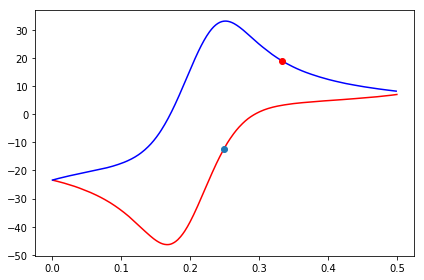

In [50]:
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[251],y1[251],marker='o')
plt.plot(x2[333],y2[333],marker='o',color = 'red')

In [18]:
peak_detection(y)

[[333, 251]]

In [39]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave5 = []
    ave15 = []
    for i in range(len(x)-5):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,5):
            a = a + k[i+j]
        ave5.append(round(a/5, 9)) # keeping 9 desimal points for more accuracy
    ave5 = np.asarray(ave5)
    for i in range(len(x)-15): 
        b = 0 
        for j in range(0,15):
            b = b + k[i+j]
        ave15.append(round(b/15, 9))
    ave15 = np.asarray(ave15)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15 - ave5[:len(ave15)])!= 0)).reshape(-1) #reshape into one row.
    return int(idx[0])

In [40]:
critical_idx(x2,y2)

54